# Linear Tree

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from lineartree import LinearTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from joblib import dump
from sklearn.tree import plot_tree
import numpy as np
from scipy.spatial.distance import euclidean

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.classification_metrics import classification

In [2]:
train =  pd.read_parquet('../../../data/model_input/train_sets/breast_cancer.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/breast_cancer.parquet')

In [3]:
y_train = train.diagnosis
X_train = train.drop(columns=['diagnosis'])

In [4]:
y_validation = validation.diagnosis
X_validation = validation.drop(columns=['diagnosis'])

We are scaling the data because we are going to fit logistic regressions

In [5]:
scaler = StandardScaler().fit(X_train)

In [6]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [25]:
max_depth = [i for i in range(1, 11)]
base_est = [LogisticRegression(penalty=None), LogisticRegression(), LogisticRegression(penalty='l1', solver='liblinear'), 
                    LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.25, max_iter=5000), 
                    LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=5000),
                    LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.75, max_iter=5000)]

In [32]:
models_list = []
names_list = []
for i in max_depth:
    for est in base_est:
        models_list.append(LinearTreeClassifier(base_estimator=est, max_depth=i))
        if est.penalty == 'elasticnet':
            names_list.append('LT_'+str(i)+'_en_'+str(est.l1_ratio))
        elif est.penalty == None:
            names_list.append('LT_'+str(i))
        else:
            names_list.append('LT_'+str(i)+'_'+str(est.penalty))

In [34]:
metrics = classification(models_list, names_list, '../../../data/model_output/metrics/breast_cancer/linear_tree.csv', X_train_scaled, y_train, X_validation_scaled, y_validation)
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
LT_1,5.437584,1.000000,0.993734,-0.626566
LT_1_l2,9.501027,0.999519,0.984336,-1.519009
LT_1_l1,4.681356,0.999492,0.979950,-1.955193
LT_1_en_0.25,128.611446,0.999465,0.981830,-1.764499
LT_1_en_0.5,156.156307,0.999465,0.979950,-1.952570
LT_1_en_0.75,244.630574,0.999385,0.994361,-0.502709
LT_2,5.438956,1.000000,0.993734,-0.626566
LT_2_l2,12.284633,0.999519,0.984336,-1.519009
LT_2_l1,5.512073,0.999679,0.978697,-2.098907
LT_2_en_0.25,151.412038,0.999465,0.981830,-1.764499


In [107]:
metrics[metrics.Run_Time<100].sort_values(by='Validation_AUC', ascending=False)

,Run_Time,Train_AUC,Validation_AUC,delta%
LT_1,5.437584,1.000000,0.993734,-0.626566
LT_4,5.695317,1.000000,0.993734,-0.626566
LT_10,4.334967,1.000000,0.993734,-0.626566
LT_9,4.487150,1.000000,0.993734,-0.626566
LT_8,5.705037,1.000000,0.993734,-0.626566
LT_7,5.822848,1.000000,0.993734,-0.626566
LT_5,5.539697,1.000000,0.993734,-0.626566
LT_6,5.655765,1.000000,0.993734,-0.626566
LT_2,5.438956,1.000000,0.993734,-0.626566
LT_3,5.394194,1.000000,0.993734,-0.626566


Models LT_1, LT_2, ..., LT_10 give exactly the same metrics because they all are just logistic regressions, as they are good models without splitting, they are left as logistic regressions simply (same results as in the logistic regression notebook). Look:

In [99]:
for i in range(0, len(models_list), 6):
    print(models_list[i].node_count)

1
1
1
1
1
1
1
1
1
1


Of the rest of the models, we choose **LT_3_l2** because it has the highest Validation AUC but with a delta a bit better

In [7]:
test = pd.read_parquet('../../../data/model_input/test_sets/breast_cancer.parquet')

In [8]:
y_test = test.diagnosis
X_test = test.drop(columns=['diagnosis'])

In [9]:
retrain = pd.concat([train, validation])

In [10]:
y_retrain = retrain.diagnosis
X_retrain = retrain.drop(columns=['diagnosis'])

In [11]:
scaler_retrain = StandardScaler().fit(X_retrain)

In [12]:
X_retrain_scaled = scaler_retrain.transform(X_retrain)
X_test_scaled = scaler_retrain.transform(X_test)

In [108]:
model = LinearTreeClassifier(base_estimator=LogisticRegression(), max_depth=3).fit(X_retrain_scaled, y_retrain)

In [109]:
test_pred = model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 0.9925


Let's check out our final model:

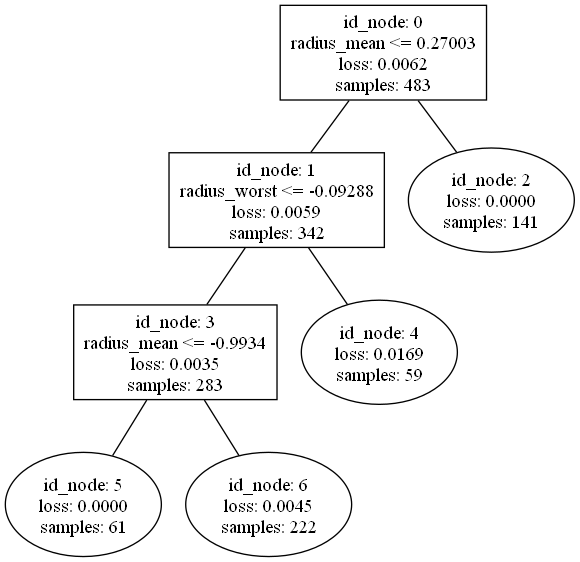

In [117]:
model.plot_model(feature_names=X_retrain.columns)

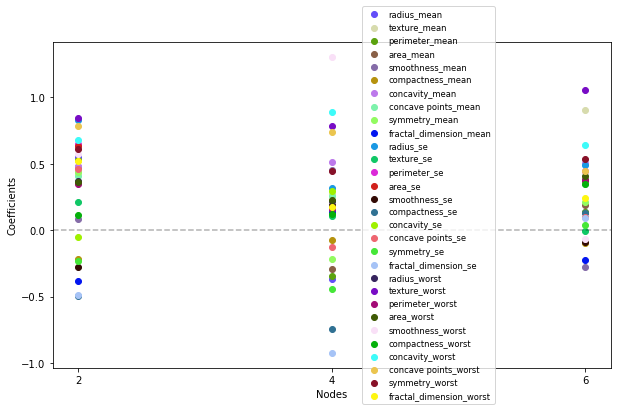

In [198]:
from sklearn.dummy import DummyClassifier


leaves = model.summary(only_leaves=True)
x_values = set()
coefs_values = []

for i in range(X_retrain.shape[1]):
    coef = []
    for node, el in leaves.items():
        if not isinstance(el['models'], DummyClassifier):
            x_values.add(node)
            coef.append([el['models'].coef_[0][i]])
    coefs_values.append(coef)

    
num_colors = len(X_retrain.columns)
temp_colors = set()
colors = []

while len(colors) < num_colors:
    new_color = np.random.rand(3, )
    color_hashable = tuple(new_color)
    if color_hashable not in temp_colors:
        dist = [euclidean(new_color, c) for c in colors]
        if min(dist, default=np.inf) > 0.3:
            temp_colors.add(color_hashable)
            colors.append(new_color)
    
    
plt.figure(figsize=(10,6))
for i in range(len(coefs_values)):
    plt.scatter(list(x_values), coefs_values[i], label=X_retrain.columns[i], color=colors[i])
plt.axhline(0, c='black', linestyle='--', alpha=0.3)
plt.ylabel('Coefficients')
plt.xlabel('Nodes')
plt.legend(loc='center right', bbox_to_anchor=(0.8, 0.5), fontsize='small')
plt.xticks(list(x_values))
plt.show()

Note that we haven't ploted node 5. This is because it has every sample of class 0, then  the algorithm, automatically, doesn't fit a logistic regression in that node but a DummyClassifier which makes predictions ignoring the input features.

In [200]:
leaves[5]

{'loss': 0.0,
 'samples': 61,
 'models': DummyClassifier(strategy='most_frequent'),
 'classes': array([0], dtype=int64)}

In [112]:
dump(model, '../../../data/model_output/models/breast_cancer/best_linear_tree.joblib')

['best_linear_tree.joblib']

In [113]:
with open('../../../data/model_output/metrics/breast_cancer/final_AUC.txt', 'a') as f:
    f.write('\nLT, '+ str(auc))

In [13]:
from joblib import load
load_mod = load('../../../data/model_output/models/breast_cancer/best_linear_tree.joblib')

In [14]:
train_pred = load_mod.predict_proba(X_retrain_scaled)[:, 1]
auc_train = roc_auc_score(y_retrain, train_pred)
test_pred = load_mod.predict_proba(X_test_scaled)[:, 1]
auc_test = roc_auc_score(y_test, test_pred)

In [15]:
import time 
time1 = time.time()
LinearTreeClassifier(base_estimator=LogisticRegression(), max_depth=3).fit(X_retrain_scaled, y_retrain)
time2 = time.time() - time1 

In [16]:
with open('../../../data/model_output/metrics/breast_cancer/final_metrics.txt', 'a') as f:
     f.write(f'\nLT; {time2}; {auc_train}; {auc_test}')